In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
a=[i for i in range(1,51)]
b=[i**5 for i in range(1,51)]

<Axes: >

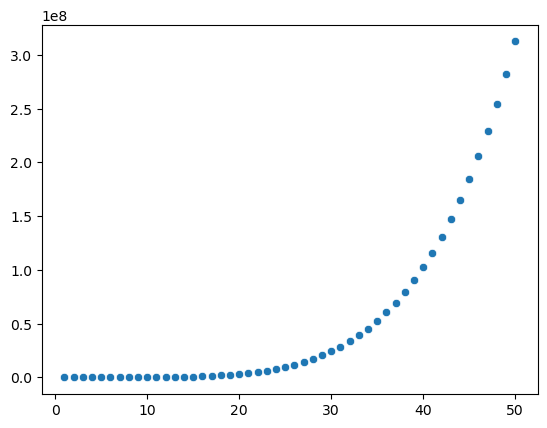

In [3]:
sns.scatterplot(x=a,y=b)

In [4]:
"""
"""

'\n'

In [5]:
df=pd.read_csv("Advertising.csv")
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df=df.drop("Unnamed: 0",axis=1)
df.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [7]:
df.info()  # no null value 
# no object type col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()
# very minimally skewed 

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
# null check
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
df.duplicated().sum() # no duplicates

np.int64(0)

In [11]:
# outlier check
numerical_cols=df.select_dtypes([int,float]).columns
numerical_cols

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

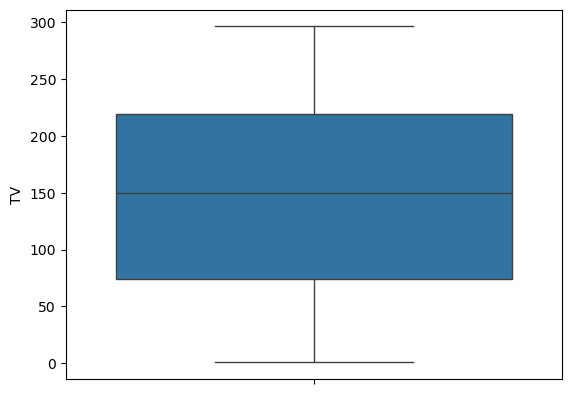

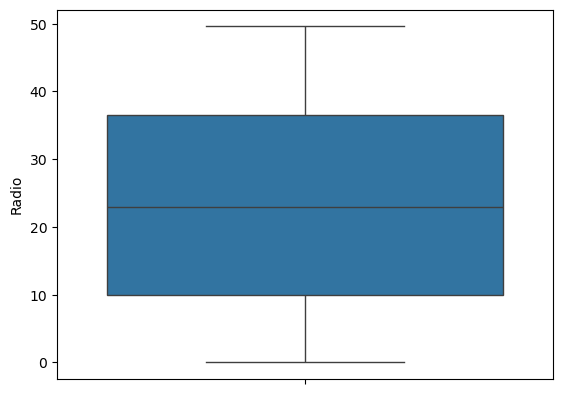

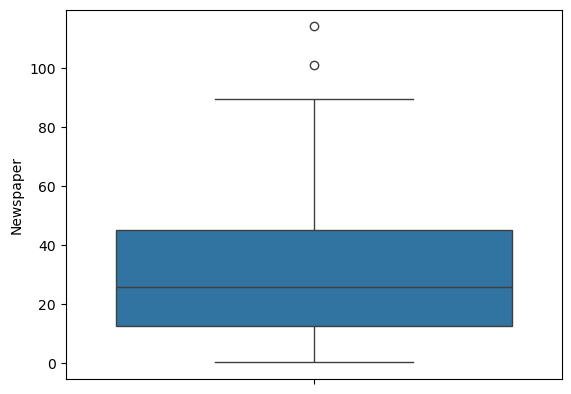

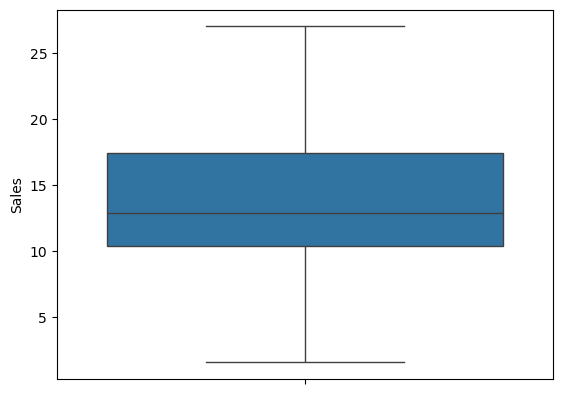

In [12]:
for i in numerical_cols:
    sns.boxplot(df[i])
    plt.show()
# outliers in newspaper

In [13]:
def replace_outiers_with_median_individual_numerical_col(df):
    numerical_cols=["Newspaper"]
    for column in numerical_cols:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lw = q1 - 1.5 * iqr
        uw = q3 + 1.5 * iqr
        print("Lower whisker : ",lw)
        print("Upper whisker : ",uw)
        median_value = df[column].median()
        # replace outlliers with median value
        # eg df.loc[(df['symboling']<0)|(df["symboling"]>2),"symboling"]
        df.loc[(df[column]<lw )| (df[column]>uw),column]=median_value
    return df
        
df=replace_outiers_with_median_individual_numerical_col(df)      
df.head()  

Lower whisker :  -35.775000000000006
Upper whisker :  93.625


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<Axes: ylabel='Newspaper'>

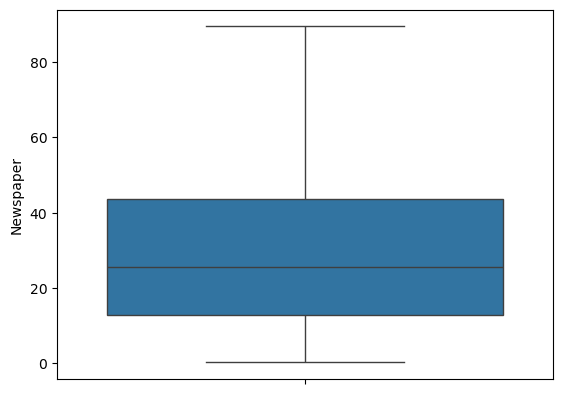

In [14]:
sns.boxplot(df["Newspaper"])

In [15]:
# skewness check
from scipy.stats import skew
for i in numerical_cols:
    print(f"{i} : {skew(df[i])}") # newspapaer has skewness

TV : -0.06932836662244649
Radio : 0.0934668451108453
Newspaper : 0.6539218548556879
Sales : 0.4045082487061191


In [16]:
# for skewness removal --
# 1.checking for -ve values presence in Newspaper
df[df["Newspaper"]<0] # no -ve value present

,TV,Radio,Newspaper,Sales


In [17]:
#Correlation with target
df[numerical_cols].corr()["Sales"].sort_values()
# highly correlated col -- TV
# least correlated -- Newspaper

Newspaper    0.215938
Radio        0.576223
TV           0.782224
Sales        1.000000
Name: Sales, dtype: float64

In [18]:
# removing skewness
df["Newspaper"]=np.sqrt(df["Newspaper"])
skew(df["Newspaper"])

np.float64(-0.04035033148515743)

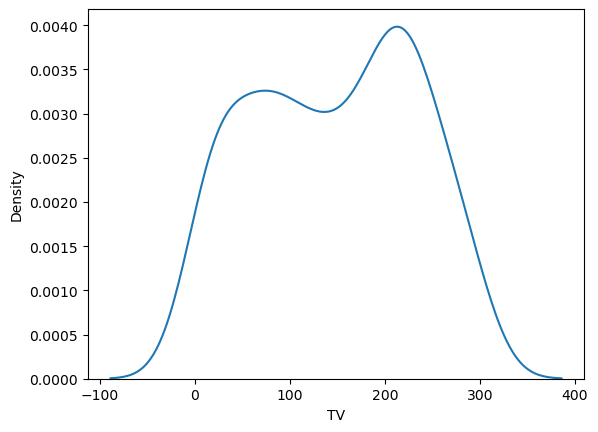

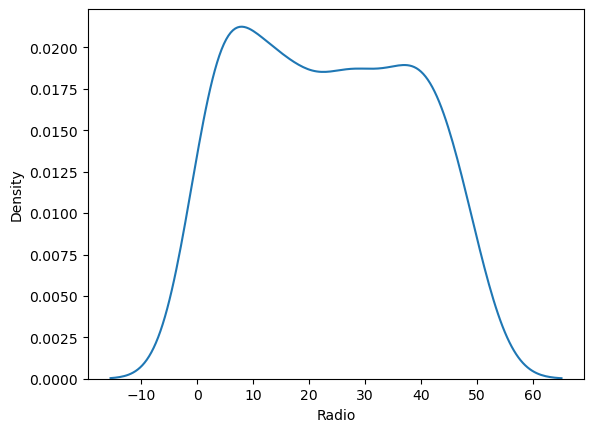

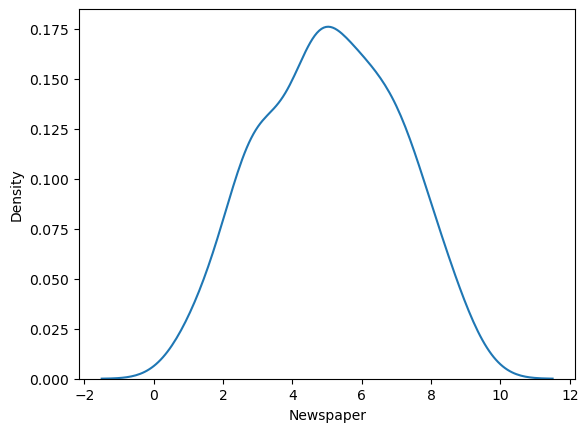

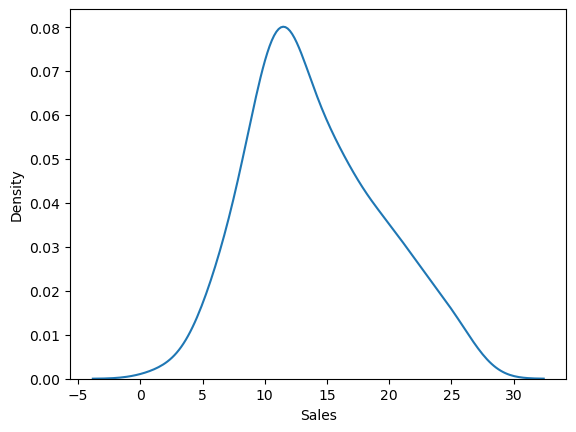

In [19]:
for i in numerical_cols:
    sns.kdeplot(df[i])
    plt.show()

In [20]:
# object datatype not present -- no encoding

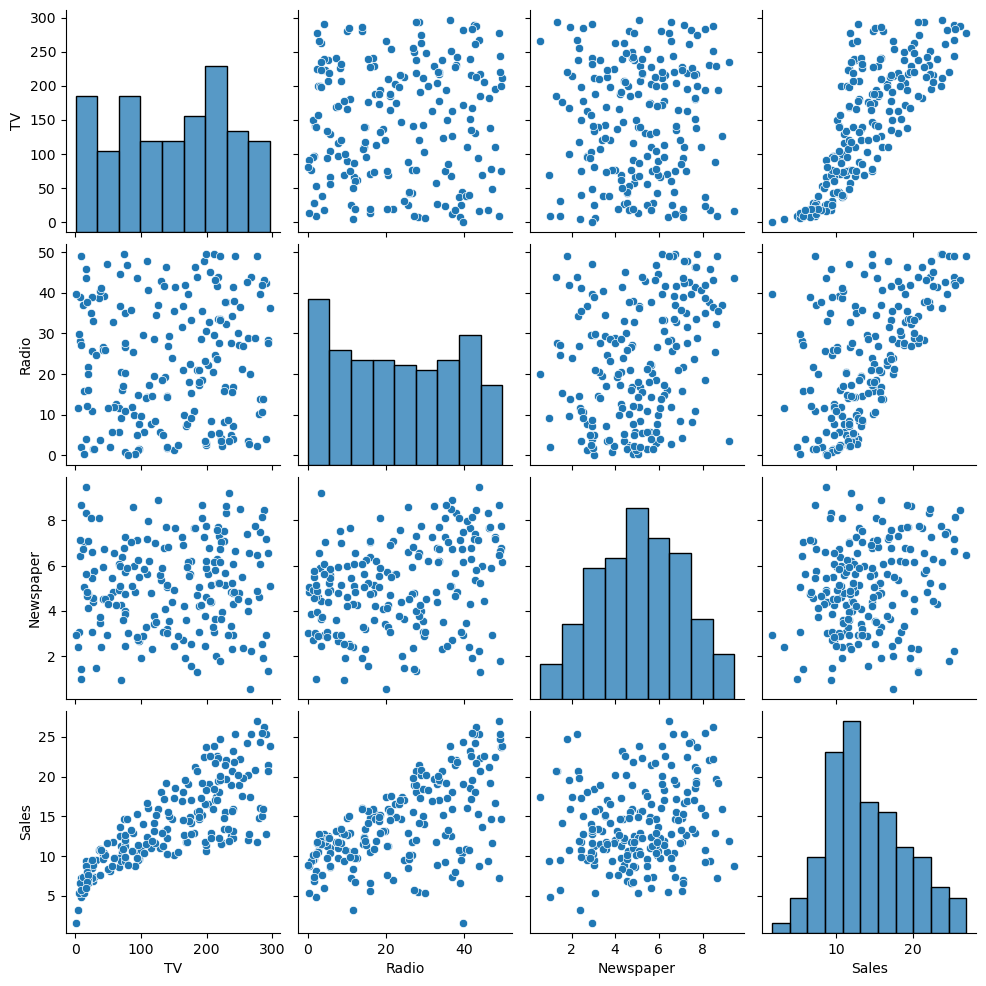

In [21]:
sns.pairplot(df) # linearity property failed

<Axes: >

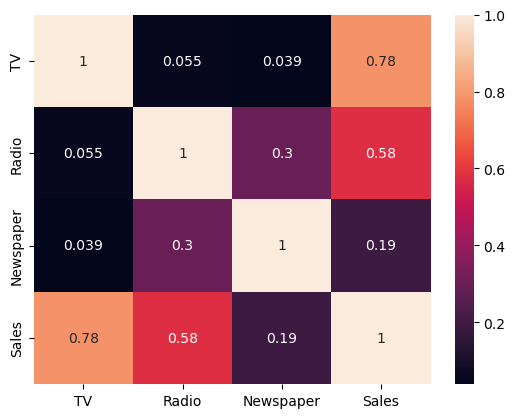

In [22]:
sns.heatmap(df[numerical_cols].corr(),annot=True) # no multicollinearity

In [23]:
features=df.drop('Sales',axis=1)
target=df['Sales']

In [24]:
# applying scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features.iloc[:]=scaler.fit_transform(features.iloc[:])
features.head()

,TV,Radio,Newspaper
0,0.969852,0.981522,1.645000
1,-1.197376,1.082808,0.829028
2,-1.516155,1.528463,1.648059
3,0.052050,1.217855,1.303888
4,0.394182,-0.841614,1.300559


In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=1)

In [26]:
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(160, 3) (160,)
(40, 3) (40,)


In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain) #
ypred=lr.predict(xtest)

In [28]:
f=pd.DataFrame({"Columns":xtrain.columns,
                "Coefficient":lr.coef_})
f

,Columns,Coefficient
0,TV,4.013961
1,Radio,2.638071
2,Newspaper,0.080359


In [29]:
lr.intercept_

np.float64(14.028400643623945)

In [30]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(ytest,ypred)
r2=r2_score(ytest,ypred)
print(f"MSE : {mse}")
print(f"R2 : {r2}")

MSE : 2.0033754912094976
R2 : 0.8921419945234771


<Axes: ylabel='Sales'>

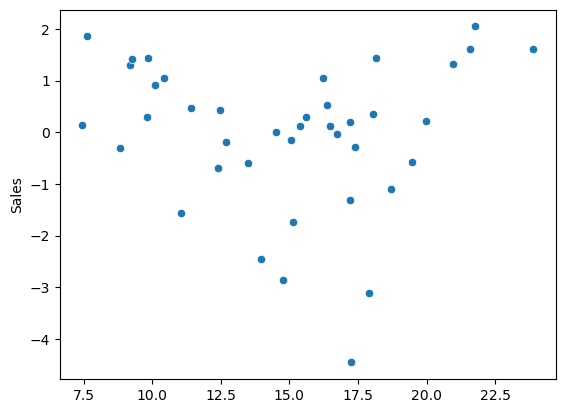

In [31]:
# homoscedascity
sns.scatterplot(x=ypred,y=(ytest-ypred)) # funnel shape variance -- not satisfied

<Axes: xlabel='Sales', ylabel='Density'>

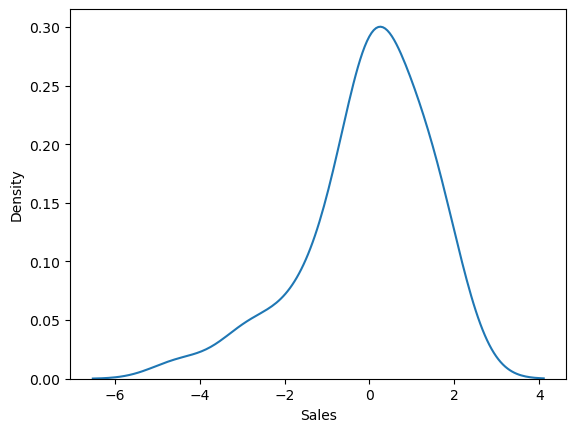

In [32]:
# Normality of residuals -- not satisfied
sns.kdeplot(ytest-ypred)

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
xtrainp=poly.fit_transform(xtrain)
xtestp=poly.transform(xtest)

In [57]:
# Hyperparameter tuning to know the right degree
for i in range(2,8):
    poly = PolynomialFeatures(degree=i)
    xtrainp=poly.fit_transform(xtrain)
    xtestp=poly.transform(xtest)
    print(xtrainp.shape)
    lr=LinearRegression()
    lr.fit(xtrainp,ytrain)
    ypred=lr.predict(xtestp)
    mse=mean_squared_error(ytest,ypred)
    r2=r2_score(ytest,ypred)
    print(f"MSE : {mse}")
    print(f"R2 : {r2}")
    print(f"""{i} : traini_score {lr.score(xtrainp,ytrain)} 
         test_score {lr.score(xtestp,ytest)}""")

(160, 10)
MSE : 0.22013042962001336
R2 : 0.9881485876273896
2 : traini_score 0.9860858169530609 
         test_score 0.9881485876273896
(160, 20)
MSE : 0.18777934737339425
R2 : 0.9898903096467703
3 : traini_score 0.9921987219260529 
         test_score 0.9898903096467703
(160, 35)
MSE : 0.15922915687609232
R2 : 0.991427398732928
4 : traini_score 0.9947153190779744 
         test_score 0.991427398732928
(160, 56)
MSE : 0.21096041209995214
R2 : 0.9886422842929614
5 : traini_score 0.9975446727194264 
         test_score 0.9886422842929614
(160, 84)
MSE : 7.9085913348919075
R2 : 0.5742161710307394
6 : traini_score 0.9983329190003088 
         test_score 0.5742161710307394
(160, 120)
MSE : 528.43574223995
R2 : -27.44999623415417
7 : traini_score 0.9992338691433043 
         test_score -27.44999623415417


In [58]:
poly = PolynomialFeatures(degree=4)
xtrainp=poly.fit_transform(xtrain)
xtestp=poly.transform(xtest)
print(xtrainp.shape)
lr=LinearRegression()
lr.fit(xtrainp,ytrain)
ypred=lr.predict(xtestp)
mse=mean_squared_error(ytest,ypred)
r2=r2_score(ytest,ypred)
print(f"MSE : {mse}")
print(f"R2 : {r2}")
# checking for overfitting - underfitting
print(f"""{i} : traini_score {lr.score(xtrainp,ytrain)} 
         test_score {lr.score(xtestp,ytest)}""")
# there is no overfitting and underfitting

(160, 35)
MSE : 0.15922915687609232
R2 : 0.991427398732928
7 : traini_score 0.9947153190779744 
         test_score 0.991427398732928


In [38]:



# degree 2 - 0.983
# degree 3- 0.9898
#Degree 4- 0.9914
# 5 - 0.98
# 6 - 0.57

In [39]:
lr.score(xtrainp,ytrain) # training acuracy

0.9947153190779744

In [40]:
lr.score(xtestp,ytest) # testing accuracy

0.991427398732928